<a href="https://colab.research.google.com/github/kkiyota63/PL4/blob/main/PL4_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ロジスティック回帰による多クラス分類(OVA)

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [58]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = [
    'Class label', 'Alcohol', 'Malic acid', 'Ash',
    'Alcalinity of ash', 'Magnesium', 'Total phenols',
    'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
    'Proline']

In [59]:
df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [60]:
X = df_wine.iloc[:, [10, 13]].values
y = df_wine.iloc[:, 0].values - 1

In [61]:
# prompt: 訓練データ、テストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
# prompt: 特徴量を標準化
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

In [63]:
model = LogisticRegression(
max_iter=100, multi_class='ovr', solver='liblinear',
C=1.0, penalty='l2', l1_ratio=None, random_state=0)

In [64]:
model.fit(X_train_std, y_train)

LogisticRegression(multi_class='ovr', random_state=0, solver='liblinear')

In [65]:
#訓練データ，テストデータにおける正解率を計算
y_test_pred = model.predict(X_test_std)
ac_score = accuracy_score(y_test, y_test_pred)
print('正解率:', ac_score)

正解率: 0.8888888888888888


Text(0.5, 1.0, 'Logistic Regression')

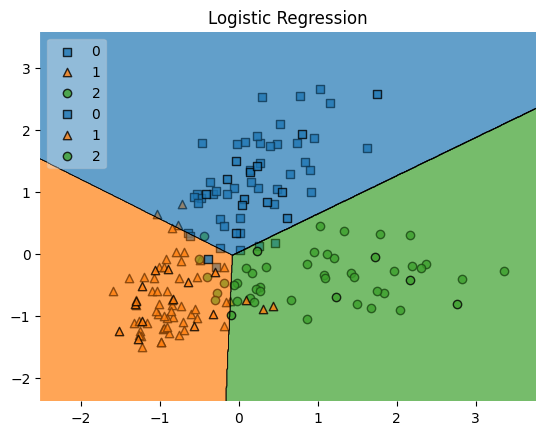

In [67]:
plot_decision_regions(X_train_std, y_train, clf=model, legend=2)
plot_decision_regions(X_test_std, y_test, clf=model, legend=2)
plt.title('Logistic Regression')

ソフトマックス回帰モデルによる多クラス分類

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [41]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = [
    'Class label', 'Alcohol', 'Malic acid', 'Ash',
    'Alcalinity of ash', 'Magnesium', 'Total phenols',
    'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
    'Proline']

In [42]:
X = df_wine.iloc[:, [10, 13]].values
y = df_wine.iloc[:, 0].values - 1

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

In [45]:
model = LogisticRegression(
max_iter=100, multi_class='multinomial', solver='lbfgs',
C=1.0, penalty='l2', l1_ratio=None, random_state=0)

In [46]:
model.fit(X_train_std, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [47]:
#訓練データ，テストデータにおける正解率を計算
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('訓練データに対する正解率:', accuracy_score(y_train, y_train_pred))
print('テストデータに対する正解率:', accuracy_score(y_test, y_test_pred))

訓練データに対する正解率: 0.31690140845070425
テストデータに対する正解率: 0.3888888888888889


Text(0.5, 1.0, 'Logistic Regression')

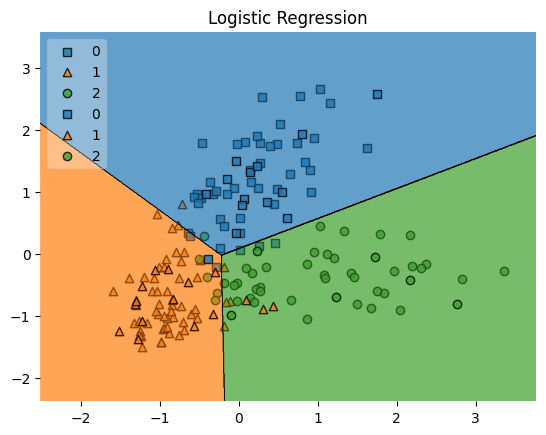

In [48]:
plot_decision_regions(X_train_std, y_train, clf=model, legend=2)
plot_decision_regions(X_test_std, y_test, clf=model, legend=2)
plt.title('Logistic Regression')

サポートベクターマシン

In [10]:
from sklearn.svm import LinearSVC

In [11]:
df_wine_4471 = df_wine[44:71]
X = df_wine_4471.iloc[:, [10, 13]].values
y = df_wine_4471.iloc[:, 0].values - 1

In [12]:
#特徴量を標準化
X_std = StandardScaler().fit_transform(X)

In [13]:
model = LinearSVC(loss='hinge',C=10000.0,multi_class='ovr',penalty='l2',random_state=0)

In [14]:
model.fit(X_std, y)

LinearSVC(C=10000.0, loss='hinge', random_state=0)

演習3

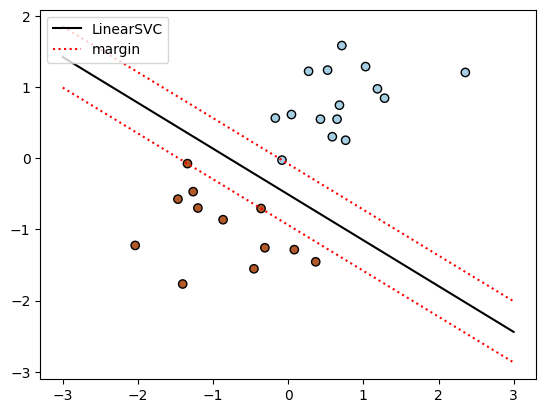

In [15]:
X_plt = np.linspace(-3, 3, 200)[:, np.newaxis]
w = model.coef_[0]
b = model.intercept_[0]
boundary = - w[0] / w[1] * X_plt - b / w[1]
margin = 1 / w[1]
margin_up = boundary + margin
margin_dn = boundary - margin
plt.plot(X_plt, boundary, linestyle='-',color='black', label='LinearSVC')
plt.plot(X_plt, margin_up, linestyle=':',color='red', label='margin')
plt.plot(X_plt, margin_dn, linestyle=':',color='red')
plt.scatter(X_std[:, 0], X_std[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='black')
plt.legend(loc='upper left')
plt.show()

演習4

In [50]:
X = df_wine.iloc[:, [10, 13]].values
y = df_wine.iloc[:, 0].values - 1

In [51]:
# prompt: 訓練データ、テストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

In [53]:
model = LinearSVC(loss='hinge',C=10000.0,multi_class='ovr',penalty='l2',random_state=0)

In [54]:
model.fit(X_train_std, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10000.0, loss='hinge', random_state=0)

In [55]:
#訓練データ，テストデータにおける正解率を計算
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('訓練データに対する正解率:', accuracy_score(y_train, y_train_pred))
print('テストデータに対する正解率:', accuracy_score(y_test, y_test_pred))

訓練データに対する正解率: 0.31690140845070425
テストデータに対する正解率: 0.3888888888888889


演習5 ガウスカーネルを用いたサポートベクタマシン

In [64]:
from sklearn.svm import SVC

In [65]:
X = df_wine.iloc[:, [9, 12]].values
y = df_wine.iloc[:, 0].values - 1

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [67]:
model = SVC(kernel='rbf',gamma=1.0,C=100.0,decision_function_shape='ovr',random_state=0)

In [68]:
model.fit(X_train, y_train)

SVC(C=100.0, gamma=1.0, random_state=0)

Text(0.5, 1.0, 'SVC')

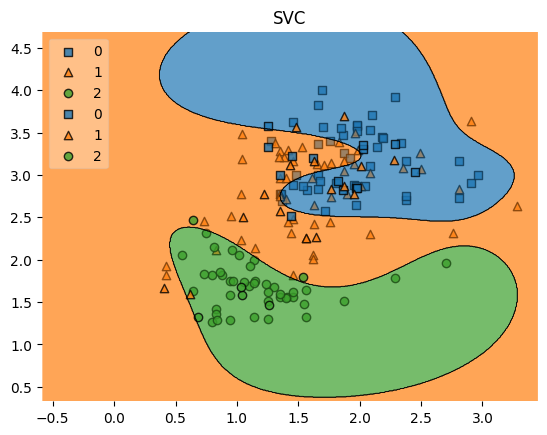

In [69]:
plot_decision_regions(X_train, y_train, clf=model, legend=2)
plot_decision_regions(X_test, y_test, clf=model, legend=2)
plt.title('SVC')

決定木

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

In [58]:
X = df_wine.iloc[:, 1:].values
y = df_wine.iloc[:, 0].values - 1

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
#木の詳細を設定
model = DecisionTreeClassifier(criterion='gini', max_depth=2,random_state=0)

In [61]:
model.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [62]:
#訓練データ、テストデータに対する正解率を表示
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('訓練データに対する正解率:', accuracy_score(y_train, y_train_pred))
print('テストデータに対する正解率:', accuracy_score(y_test, y_test_pred))

訓練データに対する正解率: 0.9225352112676056
テストデータに対する正解率: 0.9166666666666666


In [39]:
dot_data = export_graphviz(model, out_file=None,feature_names=df_wine.columns[1:],class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
graph.write_pdf('wine.pdf')
graph.write_png('wine.png')

True

演習6

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# データセットの読み込み
file_path = '/content/Stars.csv'
data = pd.read_csv(file_path)

# カテゴリカル特徴量を数値に変換
label_encoder_color = LabelEncoder()
data['Color'] = label_encoder_color.fit_transform(data['Color'])

label_encoder_spectral = LabelEncoder()
data['Spectral_Class'] = label_encoder_spectral.fit_transform(data['Spectral_Class'])


# データを特徴量とターゲットに分割
X = data.drop('Type', axis=1)
y = data['Type']

# 特徴量の正規化
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=0)

# モデルの初期化
log_reg = LogisticRegression()
svm_model = SVC()
decision_tree = DecisionTreeClassifier()

# 各モデルのトレーニングと評価
models = {'Logistic Regression': log_reg, 'Support Vector Machine': svm_model, 'Decision Tree': decision_tree}
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)  # モデルのトレーニング
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    results[model_name] = {'Training Accuracy': train_accuracy, 'Testing Accuracy': test_accuracy}

# 結果の表示
for model_name, accuracies in results.items():
    print(f"{model_name}:\n Training Accuracy: {accuracies['Training Accuracy']:.2f}, Testing Accuracy: {accuracies['Testing Accuracy']:.2f}\n")


Logistic Regression:
 Training Accuracy: 0.97, Testing Accuracy: 0.98

Support Vector Machine:
 Training Accuracy: 0.98, Testing Accuracy: 0.96

Decision Tree:
 Training Accuracy: 1.00, Testing Accuracy: 0.98

